In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


# Lets look our data

In [2]:
df = pd.read_excel("merc.xlsx")
df.head()

,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0


In [3]:
df.transmission.value_counts()

Semi-Auto    6848
Automatic    4825
Manual       1444
Other           2
Name: transmission, dtype: int64

In [4]:
#df.transmission = df.transmission.map({"Automatic":5 , "Semi-Auto":4 , "Manual":0 , "Other" : 0}).astype("int64")
#df.transmission.value_counts() # I want to use it in DL model so I mapped this feature and turn into type int64.

df.drop("transmission" , axis = 1 , inplace = True)

In [5]:
df.isna().sum() # There is no any nan value.

year          0
price         0
mileage       0
tax           0
mpg           0
engineSize    0
dtype: int64

In [6]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [7]:
df.info() # All column dtypes is okay.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13119 entries, 0 to 13118
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        13119 non-null  int64  
 1   price       13119 non-null  int64  
 2   mileage     13119 non-null  int64  
 3   tax         13119 non-null  int64  
 4   mpg         13119 non-null  float64
 5   engineSize  13119 non-null  float64
dtypes: float64(2), int64(4)
memory usage: 615.1 KB


In [8]:
# for col in df.columns:
#     print("Column Name: "+col)
#     print(df[col].value_counts()) # This is not neccessary.

# Graph Analysis

c:\Users\EmincanY\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


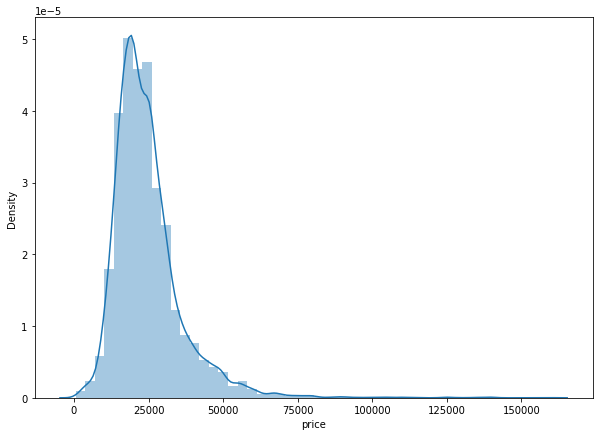

In [9]:
plt.figure(figsize = (10,7))

sns.distplot(df["price"]); # There may be some outliers.

c:\Users\EmincanY\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='count'>

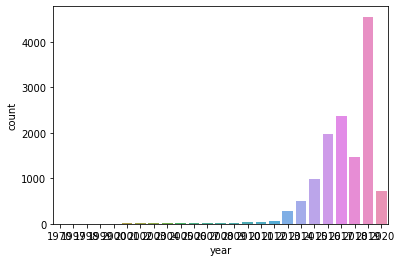

In [10]:
sns.countplot(df["year"])        # sns.distplot(df["year"]); also this could be too.

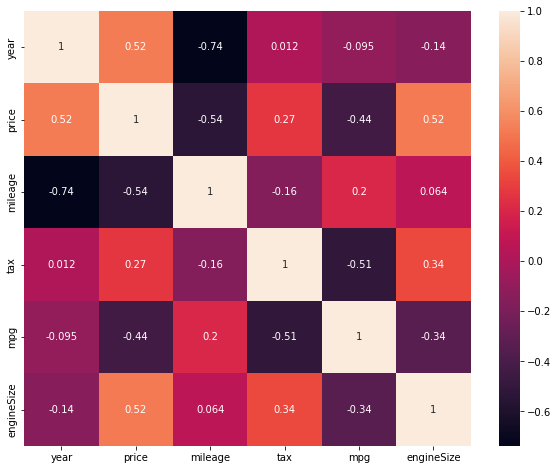

In [11]:
plt.figure(figsize=(10,8))

sns.heatmap(df.corr() , annot=True); # All feature is important.

In [12]:
df.corr()["price"].sort_values() # We want to look only our target variable correlations.

mileage      -0.537214
mpg          -0.438445
tax           0.268717
engineSize    0.516126
year          0.520712
price         1.000000
Name: price, dtype: float64

In [13]:
df.drop("tax" , axis = 1 , inplace=True)

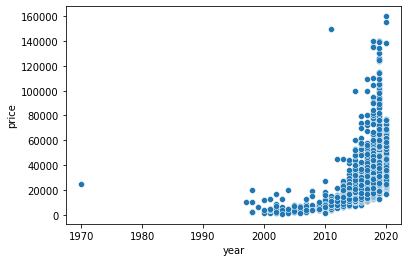

In [14]:
sns.scatterplot(x = df["year"] , y = df["price"]); # 1 outlier in 1970 year.

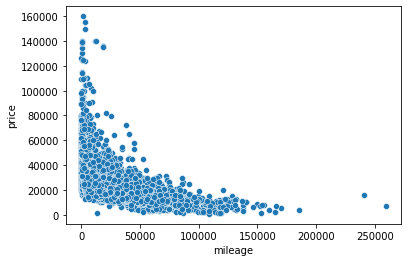

In [15]:
sns.scatterplot(x = df["mileage"] , y = df["price"]); # 2 Outlier in mileage.

In [16]:
# fig, ax = plt.subplots(1,7, figsize = (15,12))

# index = 0
# for col in df.columns:
#     sns.scatterplot(x = df[col] , y = df["price"] , ax = ax[index])
#     index += 1 # This is not neccessary...

# Data Cleaning

In [17]:
df.sort_values("price",ascending=False).head(20) # We can drop most expensive top 20 cars. Because they looks like outlier

,year,price,mileage,mpg,engineSize
6199,2020,159999,1350,21.4,4.0
10044,2020,154998,3000,21.4,4.0
5,2011,149948,3000,21.4,6.2
8737,2019,140319,785,22.1,4.0
6386,2018,139995,13046,21.4,4.0
8,2019,139948,12000,21.4,4.0
9133,2019,139559,1000,22.1,4.0
8821,2020,138439,1000,22.1,4.0
5902,2018,135771,19000,21.4,4.0
7864,2018,135124,18234,21.4,4.0


In [18]:
df.sort_values("price",ascending=True).head(20) # We can drop also most cheap car. Only 1

,year,price,mileage,mpg,engineSize
11816,2003,650,109090,40.0,1.4
12008,2010,1350,116126,54.3,2.0
11765,2000,1490,87000,27.2,3.2
11549,2002,1495,13800,39.8,2.7
12594,2004,1495,119000,34.5,1.8
11174,2001,1695,108800,31.7,3.2
12710,2006,1695,153000,33.6,1.8
12766,2004,1780,118000,41.5,2.2
12009,2007,1800,84000,42.8,1.5
11764,1998,1990,99300,32.1,2.3


In [19]:
len(df) * 0.01 # 131. So we can drop %1 of all cars. I mean we can drop max 131 cars.

131.19

In [20]:
ninetyNinePercentageDf = df.sort_values("price" , ascending=False).iloc[130:-1] # thats enough

In [21]:
ninetyNinePercentageDf.describe()

,year,price,mileage,mpg,engineSize
count,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000
mean,2017.283184,24079.958115,22124.357253,55.436503,2.051024
std,2.225116,9870.938237,21183.910378,15.026832,0.532631
min,1970.000000,1350.000000,1.000000,1.100000,0.000000
25%,2016.000000,17366.750000,6314.750000,45.600000,1.700000
50%,2018.000000,22299.000000,15363.000000,56.500000,2.000000
75%,2019.000000,28716.750000,31976.500000,64.200000,2.100000
max,2020.000000,65995.000000,259000.000000,217.300000,6.200000


c:\Users\EmincanY\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


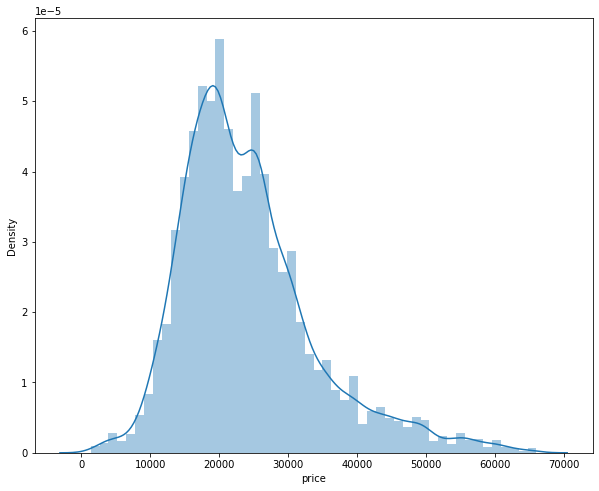

In [22]:
plt.figure(figsize = (10,8))

sns.distplot(ninetyNinePercentageDf["price"]); # This is more normal distribution now.

In [23]:
df.groupby("year").mean()["price"]

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011    12624.894737
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16731.780020
2016    19307.892948
2017    21514.307854
2018    25720.162918
2019    31290.020865
2020    35433.282337
Name: price, dtype: float64

In [24]:
ninetyNinePercentageDf.groupby("year").mean()["price"]

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     5582.666667
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34279.972973
Name: price, dtype: float64

In [25]:
df[df.year != 1970].groupby("year").mean()["price"] # Now more normal. We dropped 1970 model cars.

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011    12624.894737
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16731.780020
2016    19307.892948
2017    21514.307854
2018    25720.162918
2019    31290.020865
2020    35433.282337
Name: price, dtype: float64

In [26]:
droppedSeventysDF = df[df["year"] != 1970]
droppedSeventysDF.year.value_counts()

2019    4553
2017    2381
2016    1971
2018    1467
2015     991
2020     719
2014     491
2013     292
2012      57
2011      38
2010      38
2007      22
2009      17
2008      16
2004      13
2001      10
2002       9
2005       9
2006       8
2003       7
1998       4
2000       3
1997       1
1999       1
Name: year, dtype: int64

In [27]:
df = droppedSeventysDF
df.groupby("year").mean()["price"]

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011    12624.894737
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16731.780020
2016    19307.892948
2017    21514.307854
2018    25720.162918
2019    31290.020865
2020    35433.282337
Name: price, dtype: float64

# Create a model

## We will split olur data and then Scale them.

In [28]:
X = df.drop("price", axis = 1).values
y = df["price"].values # We use .values for change into numpy array.

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.2 , random_state=10)

In [31]:
# Scaling time.

### Scale Time

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
scaler = MinMaxScaler()

In [34]:
X_train = scaler.fit_transform(X_train)

In [35]:
X_test = scaler.transform(X_test)

## Now we are ready to create and fit our model

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [37]:
X_train.shape

(10494, 4)

In [38]:
model = Sequential()

model.add(Dense(20, activation = "relu"))
model.add(Dense(20, activation = "relu"))
model.add(Dense(20, activation = "relu"))
model.add(Dense(20, activation = "relu"))
model.add(Dense(20, activation = "relu"))
model.add(Dense(20, activation = "relu"))
model.add(Dense(20, activation = "relu"))
model.add(Dense(20, activation = "relu"))
model.add(Dense(20, activation = "relu"))
model.add(Dense(20, activation = "relu"))
model.add(Dense(20, activation = "relu"))
model.add(Dense(20, activation = "relu"))

model.add(Dense(1)) # Output layer. No need for activation function.

model.compile(optimizer = "adam" , loss = "mse") # adam is good for optimizer parameter. Also loss mse or mae

In [39]:
model.fit(x = X_train , y = y_train , validation_data=(X_test,y_test) , batch_size = 300 ,  epochs=7500) # We train and after that we test it. Both together thanks to validation_data parameter.

Epoch 1/7500
35/35 [==============================] - 1s 7ms/step - loss: 751550784.0000 - val_loss: 744920512.0000
Epoch 2/7500
35/35 [==============================] - 0s 3ms/step - loss: 749921024.0000 - val_loss: 737257152.0000
Epoch 3/7500
35/35 [==============================] - 0s 3ms/step - loss: 637965248.0000 - val_loss: 304516672.0000
Epoch 4/7500
35/35 [==============================] - 0s 3ms/step - loss: 156063904.0000 - val_loss: 124993664.0000
Epoch 5/7500
35/35 [==============================] - 0s 3ms/step - loss: 125496320.0000 - val_loss: 120799880.0000
Epoch 6/7500
35/35 [==============================] - 0s 3ms/step - loss: 120028880.0000 - val_loss: 115311008.0000
Epoch 7/7500
35/35 [==============================] - 0s 3ms/step - loss: 113031312.0000 - val_loss: 107487272.0000
Epoch 8/7500
35/35 [==============================] - 0s 3ms/step - loss: 105209136.0000 - val_loss: 99477872.0000
Epoch 9/7500
35/35 [==============================] - 0s 3ms/step - loss:

In [40]:
lossData = pd.DataFrame(model.history.history)
lossData.head()

,loss,val_loss
0,751550784.0,744920512.0
1,749921024.0,737257152.0
2,637965248.0,304516672.0
3,156063904.0,124993664.0
4,125496320.0,120799880.0


In [41]:
lossDF = lossData["loss"]
val_lossDF = lossData["val_loss"]

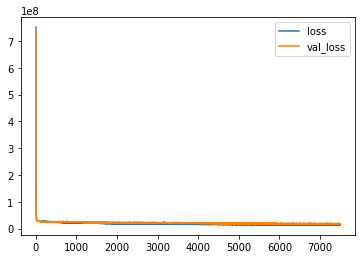

In [42]:
lossData.plot();    # This is pratic way.    # plt.figure(figsize=(15,10))

                                            # sns.lineplot(x = range(len(loss)) , y = loss)
                                            # sns.lineplot(x = range(len(val_loss)) , y = val_loss)

                                            # plt.show()

# Lets look our metrics

In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [44]:
guess = model.predict(X_test)

82/82 [==============================] - 0s 909us/step


In [45]:
mean_absolute_error(y_test , guess) # 3503 mae.

2530.0927306384574

In [46]:
df.describe()

,year,price,mileage,mpg,engineSize
count,13118.000000,13118.000000,13118.00000,13118.000000,13118.000000
mean,2017.299893,24698.574020,21950.16504,55.157059,2.071688
std,2.186129,11843.126668,21177.20571,15.220025,0.572162
min,1997.000000,650.000000,1.00000,1.100000,0.000000
25%,2016.000000,17450.000000,6096.75000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.00000,56.500000,2.000000
75%,2019.000000,28980.000000,31781.75000,64.200000,2.100000
max,2020.000000,159999.000000,259000.00000,217.300000,6.200000


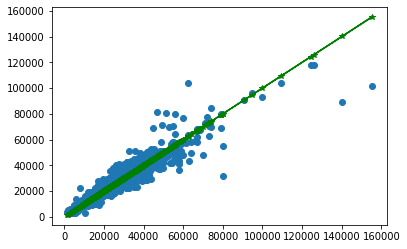

In [47]:
plt.scatter(y_test, guess); 
plt.plot(y_test,y_test , "g-*" ); # Not so anormal.

In [90]:
df.iloc[9]

year           2017.0
price         19750.0
mileage       15258.0
mpg              64.2
engineSize        2.1
Name: 9, dtype: float64

In [91]:
newCarFeatures = df.drop("price" , axis = 1).iloc[9] # That's so good.

In [92]:
newCarFeatures = scaler.transform(newCarFeatures.values.reshape(1,-1))

In [93]:
model.predict(newCarFeatures)

1/1 [==============================] - 0s 14ms/step


array([[19713.99]], dtype=float32)

# Lets save our model

In [85]:
model.save("Mercedes.h5")

In [53]:
#from tensorflow.keras.models import load_model

In [54]:
#model.save("BikeModels.h5")

In [55]:
#afterLoadedModel = load_model("BikeModels.h5")